In [38]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [39]:
data = pd.read_csv("model_data.csv")
data.columns

Index(['Unnamed: 0', 'Property_Code', 'Tenant_Code', 'Event', 'DateOccurred',
       'Unit_Code', 'DateMoveIn', 'DateMoveOut', 'Rent', 'Vacancy', 'SQFT',
       'BedRooms', 'Bathroom', 'chrent', 'LengthStay', 'Apt Size'],
      dtype='object')

In [40]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [41]:
#data.drop(data[(data.Vacancy==0)].index, inplace=True)

In [42]:
max(data["SQFT"])

1400

In [43]:
#data["LengthStay"] = data["LengthStay"].str.split(" ", n = 0, expand = True) 

In [44]:
#data["LengthStay"] = data["LengthStay"].astype(int)

In [45]:
data.drop(["DateMoveOut","DateMoveIn","Tenant_Code","Unit_Code","Event","DateOccurred","LengthStay"], axis=1, inplace= True)
data.dropna(inplace = True)

In [46]:
data2 = pd.get_dummies(data)

In [47]:
X = data2[['Vacancy', 'SQFT', 'BedRooms', 'Bathroom', 'Property_Code_ce', 'Property_Code_fh','Property_Code_mpg', 'Property_Code_sh']]
y = data2['Rent'].values.reshape(-1, 1)

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [49]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

C:\Users\Lena\Anaconda3\envs\threesix\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [50]:
### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

C:\Users\Lena\Anaconda3\envs\threesix\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Lena\Anaconda3\envs\threesix\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
#model.fit(X_train, y_train)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
predictions = model.predict(X_test_scaled)
#predictions = model.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

#MSE = mean_squared_error(y_test, predictions)
#r2 = model.score(X_test, y_test)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.20876687465722754, R2: 0.7741340510106444


In [54]:
linear_model = open("linear_model.pkl","wb")

In [55]:
import pickle
pickle.dump(model, linear_model)

In [56]:
linear_model.close()

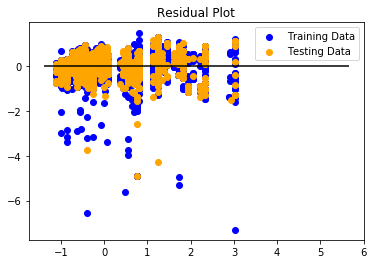

In [58]:
import matplotlib.pyplot as plt
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()